## Section 8: General Forecasting Models

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
#sns.set_style('whitegrid')
sns.set(style="darkgrid")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12,5


In [2]:
df = pd.read_csv('./Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [11]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [23]:
test_predictions = fitted_model.forecast(36)

In [24]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

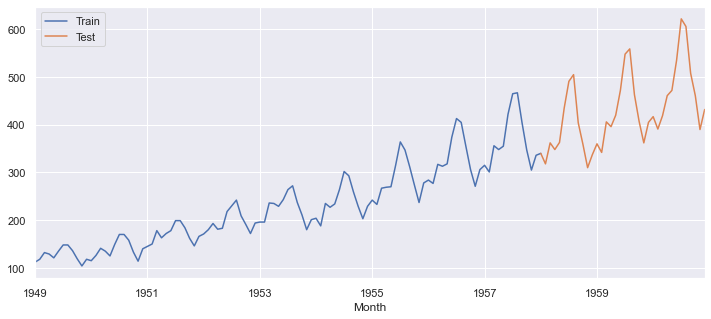

In [25]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True,label='Test')

<AxesSubplot:xlabel='Month'>

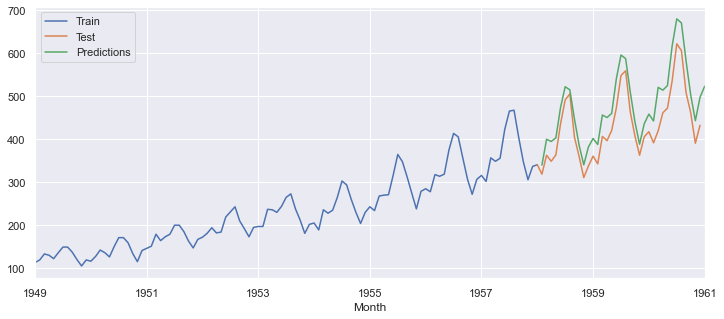

In [26]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predictions')

<AxesSubplot:xlabel='Month'>

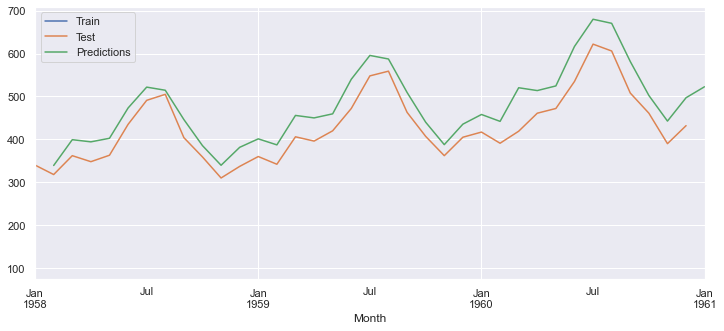

In [27]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predictions',xlim=['1958-01-01','1961-01-01'])